In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from main.utils.data_manage_utils import load_processed_data_by_folder

ROOT_PATH = os.path.abspath("../../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/base/class")

In [2]:
X_train, y_train, X_test, y_test = load_processed_data_by_folder(INPUT_FOLDER)
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
print("X_train table: ")
X_train

Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)
X_train table: 


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,...,0,0,3,0,2,0.0,3.0,0.0,0.0,3.0
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,...,0,0,0,2,0,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,...,0,2,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0


In [3]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from main.utils.data_manage_utils import print_time

# Converting DataFrames to numpy and flatten y-arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Initializing model
clf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Initialize StratifiedKFold with 5 folds
k = 5
skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

# Perform stratified cross-validation with increasing max-depth
results_array = []
n_values = 10
start = 3
steps = 3
depth_range = [i for i in range(start,start*n_values+1,steps)]
for depth in depth_range:
    start, start_str = print_time()
    print(f"Starting depth {depth}/{max(depth_range)} at {start_str}...")
    clf.max_depth = depth
    val_scores = []
    train_scores = []
    count = 1
    for train_index, test_index in skf.split(X_train, y_train):
        print(f"Starting fold {count}/{5}...")
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
        # Fit the classifier on the training data
        clf.fit(X_train_fold, y_train_fold)
    
        # Evaluate the classifier on the validation and training data
        v_s = clf.score(X_val_fold, y_val_fold)
        val_scores.append(v_s)
        t_s = clf.score(X_train_fold, y_train_fold)
        train_scores.append(t_s)
        
        # Document score for run
        print(f"\tValidation score: {v_s:.4f}")
        print(f"\tTraining score: {t_s:.4f}")
        count += 1
        
    # Calculate measures for documentation and plots
    end,end_str = print_time()
    duration = end-start
    mean_val_score = sum(val_scores) / len(val_scores)
    mean_train_score = sum(train_scores) / len(train_scores)
    std_val_score = np.std(val_scores)
    std_train_score = np.std(train_scores)
    
    # Print the cross-validation scores
    print("\n=========================")
    print(f"Results for depth {depth}:")
    print("Cross-validation train scores:", train_scores)
    print("Cross-validation validation scores:", val_scores)
    
    # Print the mean and standard deviation of the cross-validation scores
    print("Validation:")
    print("\tMean accuracy:", mean_val_score)
    print("\tStandard deviation of accuracy:", std_val_score)
    print("Training:")
    print("\tMean accuracy:", mean_train_score)
    print("\tStandard deviation of accuracy:", std_train_score)
    print("Time: ", duration)
    print("=========================\n")
    
    # Add results from run into array
    results_array.append((depth,duration,(mean_val_score, std_val_score), (mean_train_score,std_train_score)))


Starting depth 3/30 at 2024_05_08 21:42...
Starting fold 1/5...
	Validation score: 0.5882
	Training score: 0.5888
Starting fold 2/5...
	Validation score: 0.5911
	Training score: 0.5858
Starting fold 3/5...
	Validation score: 0.5877
	Training score: 0.5920
Starting fold 4/5...
	Validation score: 0.5871
	Training score: 0.5882
Starting fold 5/5...
	Validation score: 0.5823
	Training score: 0.5859

Results for depth 3:
Cross-validation train scores: [0.5888261470438776, 0.585753432464393, 0.5919700992102126, 0.5882135037969634, 0.5858503827814822]
Cross-validation validation scores: [0.588229706882468, 0.5910791968237685, 0.5876978020934253, 0.5870899109059479, 0.5822568389057751]
Validation:
	Mean accuracy: 0.5872706911222769
	Standard deviation of accuracy: 0.0028558097353920753
Training:
	Mean accuracy: 0.5881227130593858
	Standard deviation of accuracy: 0.00228396225677346
Time:  0:01:09.682122

Starting depth 6/30 at 2024_05_08 21:43...
Starting fold 1/5...
	Validation score: 0.6259


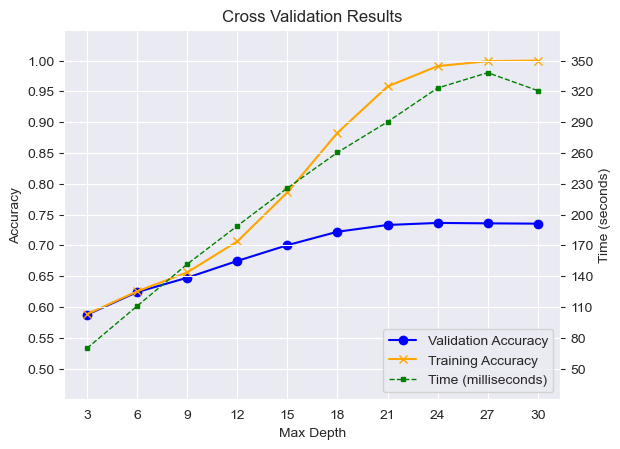

In [79]:
# Create data
depth = []
time = []
val_acc = []
train_acc = []
for tuple in results_array:
    depth.append(tuple[0])
    time.append(tuple[1].seconds + (tuple[1].microseconds / 10**6))
    val_acc.append(tuple[2][0])
    train_acc.append(tuple[3][0])

# Start with plot
fig, ax1 = plt.subplots()

# Accuracy plots
val_line = ax1.plot(depth, val_acc, label='Validation Accuracy', marker='o', color='blue')
train_line = ax1.plot(depth, train_acc, label='Training Accuracy', marker='x', color='orange')

# Create twin axes for seconds data
ax2 = ax1.twinx()

# Milliseconds plot
time_line = ax2.plot(depth, time, label='Time (milliseconds)', marker='s', color='green', linestyle="dashed", linewidth=1, markersize = 3)

# Set labels and title
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Cross Validation Results')
ax2.set_ylabel('Time (seconds)')
# Combine legend for both axes
lines = val_line + train_line + time_line
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc="lower right")
# Setting x_ticks
ax1.set_xticks(np.arange(start=min(depth), stop=max(depth)+3, step=3))
# Setting y_ticks
steps = 10
y1_min = 0.50
y1_max = 1.00
y1_step = (y1_max - y1_min) / steps
y2_min = 50
y2_max = 350
y2_step = (y2_max - y2_min) / steps
ax1.set_yticks(np.arange(start = y1_min, stop = y1_max + y1_step, step = y1_step))
ax2.set_yticks(np.arange(start = y2_min, stop = y2_max + y2_step, step = y2_step))
ax2.set_ylim(top=y2_max + y2_step, bottom = y2_min - y2_step)
ax1.set_ylim(top = y1_max + y1_step, bottom = y1_min - y1_step)
# Add grid lines
ax1.grid(True)

plt.show()